# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import pickle

# Loading Dataset

In [2]:
df = pd.read_csv("datasets/Training.csv")

In [3]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
df.shape

(4920, 133)

In [5]:
df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [6]:
len(df['prognosis'].unique())

41

In [7]:
df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
X = df.drop(columns="prognosis",axis = 1)
Y = df["prognosis"]

In [12]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Y.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [14]:
c=X.corr()
c

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
itching,4920.0,0.137805,0.344730,0.0,0.0,0.0,0.0,1.0
skin_rash,4920.0,0.159756,0.366417,0.0,0.0,0.0,0.0,1.0
nodal_skin_eruptions,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
continuous_sneezing,4920.0,0.045122,0.207593,0.0,0.0,0.0,0.0,1.0
shivering,4920.0,0.021951,0.146539,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
small_dents_in_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
inflammatory_nails,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
blister,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0
red_sore_around_nose,4920.0,0.023171,0.150461,0.0,0.0,0.0,0.0,1.0


<Axes: >

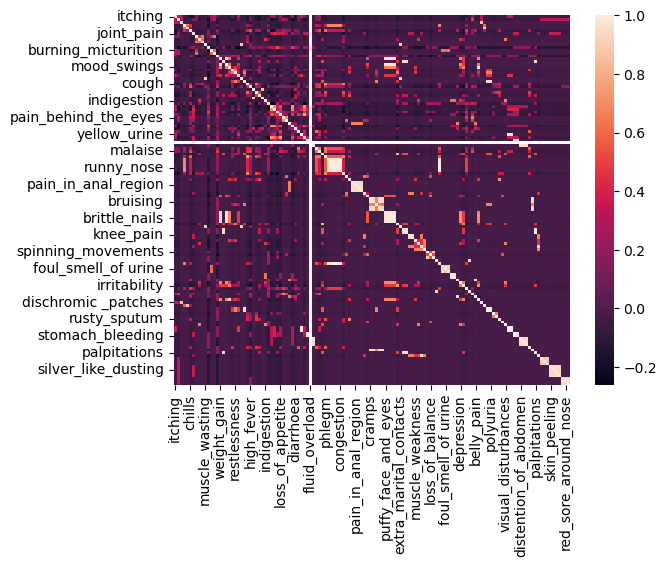

In [16]:
sns.heatmap(c)

<Axes: >

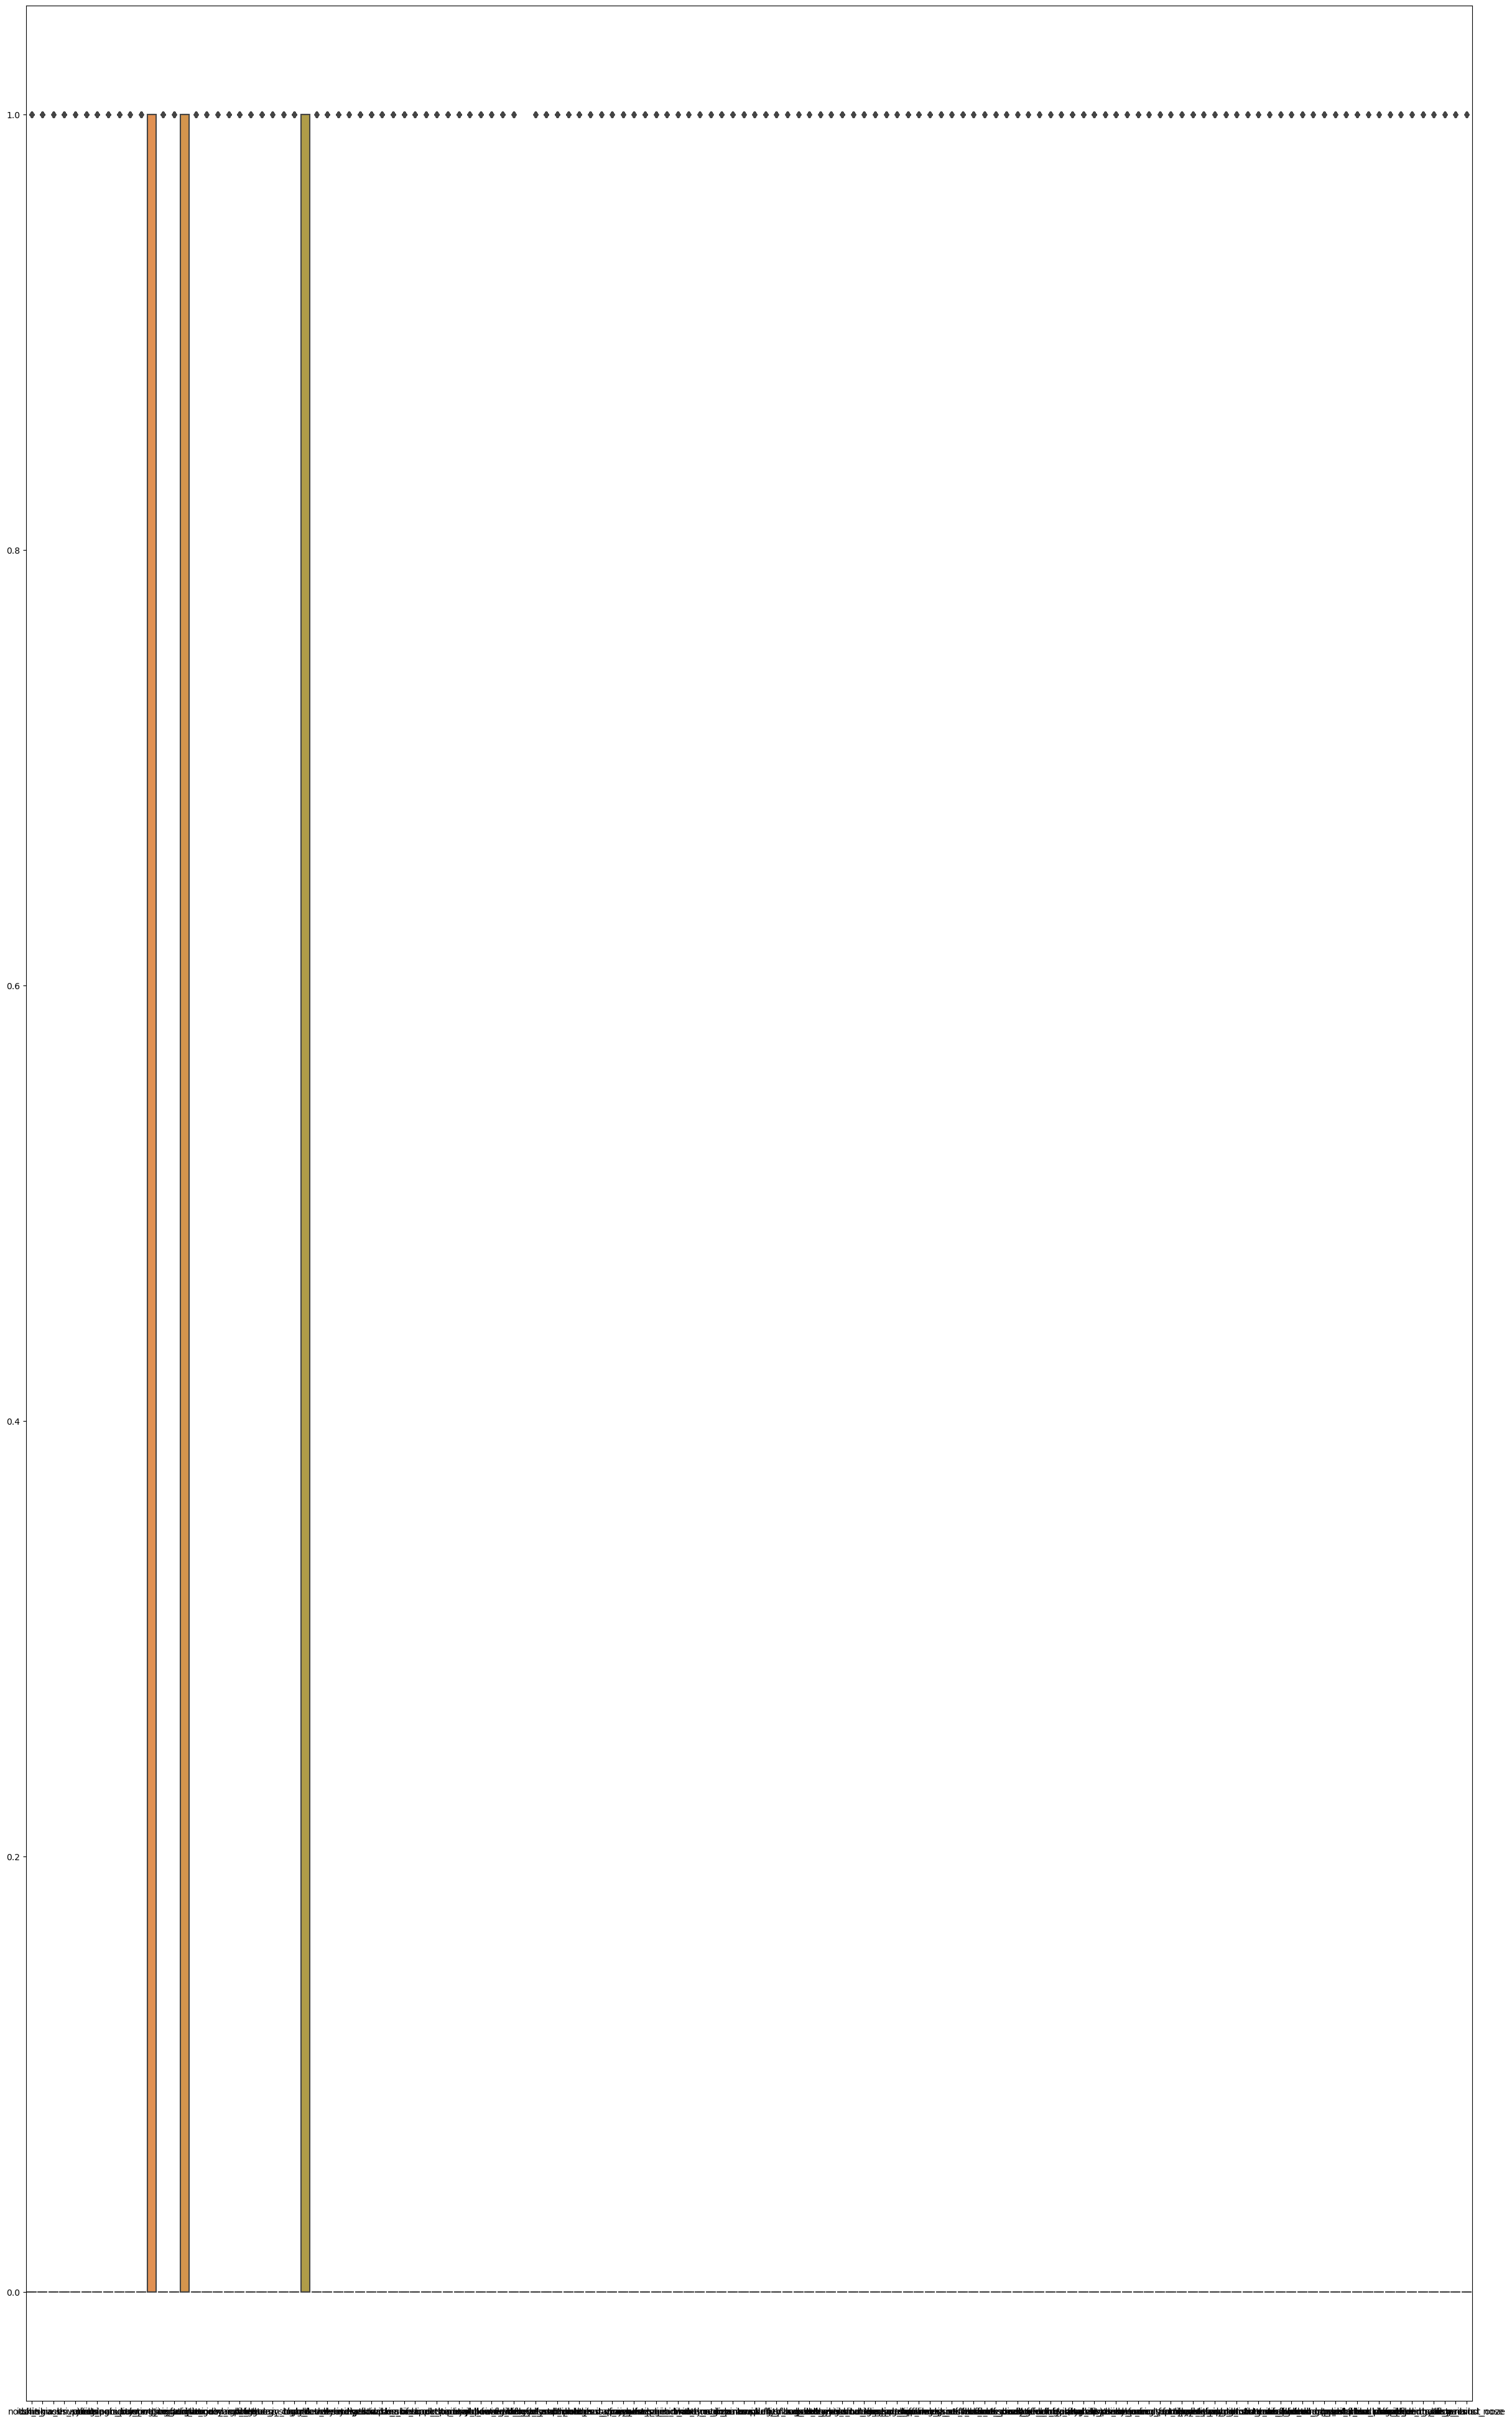

In [18]:
f=plt.figure()
f.set_figwidth(30)
f.set_figheight(50)
sns.boxplot(df)

In [19]:
le = LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [21]:
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)

x_train :  (3444, 132)
x_test :  (1476, 132)
y_train :  (3444,)
y_test :  (1476,)


In [22]:
x_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
373,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3857,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4767,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y_test

array([ 2,  2, 24, ..., 30, 26, 11])

# Train top models

In [24]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
"""
#create a dictionary to store models
models = {
    "SVC" : SVC(kernel = "linear"),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100,random_state=42),
    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=100,random_state=42),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors = 5),
    "MultinomialNB" : MultinomialNB()
}
for model_name , model in models.items():
    #train model
    model.fit(x_train,y_train)
    #test model
    predictions = model.predict(x_test)
    
    #calculate accuracy
    accuracy = accuracy_score(y_test,predictions)
    
    cm=confusion_matrix(y_test,predictions)
    
    print(f"{model_name} accuracy : {accuracy}")
    print(f"{model_name} Confusion Matrix : ")
    print(np.array2string(cm , separator=','))"""

'\n#create a dictionary to store models\nmodels = {\n    "SVC" : SVC(kernel = "linear"),\n    "RandomForestClassifier" : RandomForestClassifier(n_estimators=100,random_state=42),\n    "GradientBoostingClassifier" : GradientBoostingClassifier(n_estimators=100,random_state=42),\n    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors = 5),\n    "MultinomialNB" : MultinomialNB()\n}\nfor model_name , model in models.items():\n    #train model\n    model.fit(x_train,y_train)\n    #test model\n    predictions = model.predict(x_test)\n    \n    #calculate accuracy\n    accuracy = accuracy_score(y_test,predictions)\n    \n    cm=confusion_matrix(y_test,predictions)\n    \n    print(f"{model_name} accuracy : {accuracy}")\n    print(f"{model_name} Confusion Matrix : ")\n    print(np.array2string(cm , separator=\',\'))'

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
svc = SVC(kernel='linear')
svc.fit(x_train,y_train)
ypred=svc.predict(x_test)
accuracy_score(y_test,ypred)

1.0

In [26]:
con = confusion_matrix(y_test,ypred)
print(con)

[[32  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 41 ...  0  0  0]
 ...
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  0 37  0]
 [ 0  0  0 ...  0  0 39]]


In [27]:
pickle.dump(svc,open("svc.pkl","wb"))

In [28]:
svc = pickle.load(open('svc.pkl','rb'))

# Let's test the model babe.......

In [29]:
#test 1
a=x_test.iloc[6].values.reshape([1,-1])
print("Predicted value : ",svc.predict(a))
print("Accurate value : ", y_test[6])

Predicted value :  [25]
Accurate value :  25


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
#test 2
a=x_test.iloc[56].values.reshape([1,-1])
print("Predicted value : ",svc.predict(a))
print("Accurate value : ", y_test[56])

Predicted value :  [37]
Accurate value :  37


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [31]:
#test 3
a=x_test.iloc[22].values.reshape([1,-1])
print("Predicted value : ",svc.predict(a))
print("Accurate value : ", y_test[22])

Predicted value :  [19]
Accurate value :  19


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
#test 4
a=x_test.iloc[30].values.reshape([1,-1])
print("Predicted value : ",svc.predict(a))
print("Accurate value : ", y_test[30])

C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predicted value :  [9]
Accurate value :  9


In [33]:
symptom_description = pd.read_csv("datasets/symptoms_df.csv")
precautions = pd.read_csv("datasets/precautions_df.csv")
workout = pd.read_csv("datasets/workout_df.csv")
description = pd.read_csv("datasets/description.csv")
medications = pd.read_csv("datasets/medications.csv")
diets = pd.read_csv("datasets/diets.csv")

In [34]:
symptom_description.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [35]:
precautions.head()

,Unnamed: 0,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [36]:
workout.head()

,Unnamed: 0.1,Unnamed: 0,disease,workout
0,0,0,Fungal infection,Avoid sugary foods
1,1,1,Fungal infection,Consume probiotics
2,2,2,Fungal infection,Increase intake of garlic
3,3,3,Fungal infection,Include yogurt in diet
4,4,4,Fungal infection,Limit processed foods


In [37]:
description.head()

,Disease,Description
0,Fungal infection,Fungal infection is a common skin condition ca...
1,Allergy,Allergy is an immune system reaction to a subs...
2,GERD,GERD (Gastroesophageal Reflux Disease) is a di...
3,Chronic cholestasis,Chronic cholestasis is a condition where bile ...
4,Drug Reaction,Drug Reaction occurs when the body reacts adve...


In [38]:
medications.head()

,Disease,Medication
0,Fungal infection,"['Antifungal Cream', 'Fluconazole', 'Terbinafi..."
1,Allergy,"['Antihistamines', 'Decongestants', 'Epinephri..."
2,GERD,"['Proton Pump Inhibitors (PPIs)', 'H2 Blockers..."
3,Chronic cholestasis,"['Ursodeoxycholic acid', 'Cholestyramine', 'Me..."
4,Drug Reaction,"['Antihistamines', 'Epinephrine', 'Corticoster..."


In [39]:
diets.head()

,Disease,Diet
0,Fungal infection,"['Antifungal Diet', 'Probiotics', 'Garlic', 'C..."
1,Allergy,"['Elimination Diet', 'Omega-3-rich foods', 'Vi..."
2,GERD,"['Low-Acid Diet', 'Fiber-rich foods', 'Ginger'..."
3,Chronic cholestasis,"['Low-Fat Diet', 'High-Fiber Diet', 'Lean prot..."
4,Drug Reaction,"['Antihistamine Diet', 'Omega-3-rich foods', '..."


In [40]:
df.columns.values

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_ urination',
       'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets',
       'mood_swings', 'weight_loss', 'restlessness', 'lethargy',
       'patches_in_throat', 'irregular_sugar_level', 'cough',
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating',
       'dehydration', 'indigestion', 'headache', 'yellowish_skin',
       'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes',
       'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea',
       'mild_fever', 'yellow_urine', 'yellowing_of_eyes',
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach',
       'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision',
       'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_press

In [41]:
dis={}
symp={}
for i in range(0,4920) :
    a=df['prognosis'][i]
    b=Y[i]
    if b not in dis.keys():
        dis[b]=a
print(dis)
for j in range(0,132) :
    x=df.columns[j]
    symp[x]=j
print(symp)

{15: 'Fungal infection', 4: 'Allergy', 16: 'GERD', 9: 'Chronic cholestasis', 14: 'Drug Reaction', 33: 'Peptic ulcer diseae', 1: 'AIDS', 12: 'Diabetes ', 17: 'Gastroenteritis', 6: 'Bronchial Asthma', 23: 'Hypertension ', 30: 'Migraine', 7: 'Cervical spondylosis', 32: 'Paralysis (brain hemorrhage)', 28: 'Jaundice', 29: 'Malaria', 8: 'Chicken pox', 11: 'Dengue', 37: 'Typhoid', 40: 'hepatitis A', 19: 'Hepatitis B', 20: 'Hepatitis C', 21: 'Hepatitis D', 22: 'Hepatitis E', 3: 'Alcoholic hepatitis', 36: 'Tuberculosis', 10: 'Common Cold', 34: 'Pneumonia', 13: 'Dimorphic hemmorhoids(piles)', 18: 'Heart attack', 39: 'Varicose veins', 26: 'Hypothyroidism', 24: 'Hyperthyroidism', 25: 'Hypoglycemia', 31: 'Osteoarthristis', 5: 'Arthritis', 0: '(vertigo) Paroymsal  Positional Vertigo', 2: 'Acne', 38: 'Urinary tract infection', 35: 'Psoriasis', 27: 'Impetigo'}
{'itching': 0, 'skin_rash': 1, 'nodal_skin_eruptions': 2, 'continuous_sneezing': 3, 'shivering': 4, 'chills': 5, 'joint_pain': 6, 'stomach_pain

In [42]:
def helper(dis) :
    description_output = description[description['Disease']==dis]['Description']
    description_output = " ".join([w for w in description_output])
    
    precaution_output=precautions[precautions['Disease']==dis][['Precaution_1','Precaution_2','Precaution_3','Precaution_4']]
    precaution_output=[col for col in precaution_output.values]
    
    medication_output = medications[medications['Disease']== dis]['Medication']
    med = [med for med in medication_output.values]
    
    diet_output = diets[diets['Disease']==dis]['Diet']
    diet_output = [die for die in diet_output.values]
    
    workout_output = workout[workout['disease']==dis]['workout']
    
    return description_output , precaution_output , medication_output , diet_output , workout_output

In [43]:
def get_predicted_disease(symptoms) : 
    input_vector=np.zeros(len(symp))
    for item in symptoms :
        input_vector[symp[item]] = 1
    return dis[svc.predict([input_vector])[0]]

In [44]:
patient_input = input("Enter your symptoms : ")
patient_input = [i.strip() for i in patient_input.split(',')]
patient_input = [sym.strip("[]' ") for sym in patient_input]
output_disease=get_predicted_disease(patient_input)
output_description , output_precaution , output_medication , output_diet , output_workout = helper(output_disease)
print("***************************Disease****************************")
print(output_disease)
print("*************************Description**************************")
print(output_description)
print("*************************Precaution***************************")
i=1
for pai in output_precaution[0]:
    print(pai)
    i=i+1
print("*************************Medication***************************")
i=1
for mai in output_medication:
    print(mai)
    i=i+1
print("***************************Diet*******************************")
i=1
for dai in output_diet:
    print(dai)
    i=i+1
print("**************************Workout******************************")
i=1
for wai in output_workout:
    print(wai)
    i=i+1

Enter your symptoms : itching , skin_rash , shivering , chills
***************************Disease****************************
Fungal infection
*************************Description**************************
Fungal infection is a common skin condition caused by fungi.
*************************Precaution***************************
bath twice
use detol or neem in bathing water
keep infected area dry
use clean cloths
*************************Medication***************************
['Antifungal Cream', 'Fluconazole', 'Terbinafine', 'Clotrimazole', 'Ketoconazole']
***************************Diet*******************************
['Antifungal Diet', 'Probiotics', 'Garlic', 'Coconut oil', 'Turmeric']
**************************Workout******************************
Avoid sugary foods
Consume probiotics
Increase intake of garlic
Include yogurt in diet
Limit processed foods
Stay hydrated
Consume green tea
Eat foods rich in zinc
Include turmeric in diet
Eat fruits and vegetables


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [45]:
print(sklearn.__version__)

1.5.1
